# Real Estate Investment Time Series Analysis

## Exploratory Data Analysis

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
errors_df = pd.read_pickle('../data/processed/errors_df.pkl')
zipcodes = pd.read_pickle('../data/processed/zipcodes.pkl')

In [5]:
zipcodes

,94601,48240,94590,33705,37210,15201,33460,33030,37207,11216,...,48239,33068,32205,80219,30238,33982,33805,49507,89104,33409
time,,,,,,,,,,,,,,,,,,,,,
1996-04-01,114600.0,67800.0,108200.0,54600.0,60800.0,34400.0,59800.0,76700.0,63600.0,146100.0,...,80100.0,82000.0,54700.0,83700.0,85300.0,64100.0,41900.0,49700.0,94800.0,77300.0
1996-05-01,114500.0,68200.0,107800.0,54800.0,61000.0,34600.0,59900.0,76600.0,63600.0,146600.0,...,80700.0,81900.0,54600.0,84000.0,85300.0,63700.0,41900.0,51000.0,94700.0,77200.0
1996-06-01,114500.0,68500.0,107500.0,55000.0,61200.0,34700.0,60000.0,76500.0,63600.0,147200.0,...,81300.0,81800.0,54400.0,84300.0,85300.0,63300.0,42000.0,52300.0,94700.0,77200.0
1996-07-01,114400.0,68800.0,107300.0,55200.0,61300.0,34700.0,60200.0,76400.0,63700.0,147700.0,...,81900.0,81700.0,54300.0,84700.0,85300.0,62900.0,42100.0,53500.0,94700.0,77100.0
1996-08-01,114400.0,69200.0,107100.0,55400.0,61500.0,34800.0,60400.0,76300.0,64000.0,148400.0,...,82500.0,81600.0,54200.0,85100.0,85200.0,62500.0,42200.0,54600.0,94800.0,77100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,535800.0,71000.0,357100.0,167100.0,217200.0,170400.0,206000.0,209200.0,189500.0,1545700.0,...,90800.0,209200.0,141100.0,298100.0,95400.0,187800.0,97000.0,106600.0,196300.0,190000.0
2018-01-01,546900.0,72300.0,362500.0,168200.0,219300.0,171400.0,209600.0,211100.0,191400.0,1540200.0,...,91900.0,211000.0,144100.0,302600.0,97200.0,192500.0,99000.0,107800.0,199500.0,192500.0
2018-02-01,555000.0,73500.0,366900.0,171100.0,221500.0,173900.0,211600.0,212700.0,193900.0,1553600.0,...,93600.0,213700.0,146100.0,306900.0,99100.0,196400.0,100400.0,108900.0,202500.0,193700.0


In [6]:
columns_20 = zipcodes.columns[0:20]

In [7]:
columns_20

Index(['94601', '48240', '94590', '33705', '37210', '15201', '33460', '33030',
       '37207', '11216', '33461', '33415', '32807', '34234', '34207', '34982',
       '33055', '33801', '30316', '33135'],
      dtype='object')

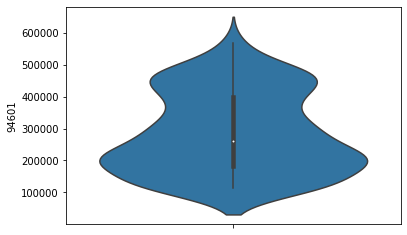

In [9]:
sns.violinplot(y=zipcodes[columns_20[0]])

In [11]:
melted_zips = zipcodes.melt(var_name='zipcode', value_name='price')

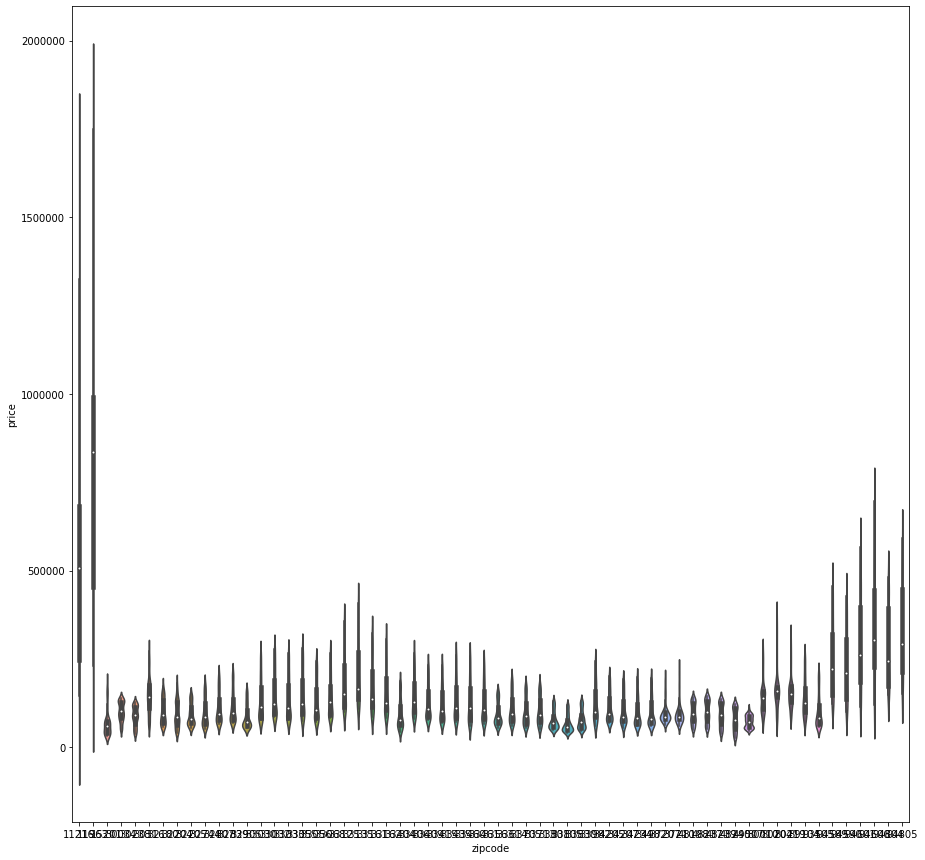

In [13]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.violinplot(x='zipcode', y='price', data=melted_zips)

In [25]:
errors_df.replace(to_replace=np.inf, value=800, inplace=True)

In [26]:
errors_df

,94601,48240,94590,33705,37210,15201,33460,33030,37207,11216,...,48239,33068,32205,80219,30238,33982,33805,49507,89104,33409
time,,,,,,,,,,,,,,,,,,,,,
2005-03-01,0.198816,1.160469,0.050062,0.204700,0.556428,0.153183,0.287780,0.244003,0.977744,0.211050,...,1.234784,0.674110,0.189255,0.959610,0.448001,0.244193,0.307724,0.194984,0.253500,0.298641
2005-04-01,0.185480,1.292595,0.048766,0.214983,0.542404,0.293860,0.288321,0.259267,0.998884,0.220657,...,1.789909,0.659905,0.205836,1.001248,0.460966,0.272226,0.295506,0.084532,0.258988,0.307420
2005-05-01,0.198448,1.199488,0.048701,0.220525,0.407560,0.201076,0.305051,0.286829,0.651325,0.250153,...,1.321828,0.626524,0.231907,0.944602,0.598628,0.302943,0.337566,0.057431,0.273154,0.301942
2005-06-01,0.171409,1.433556,0.051104,0.233000,0.447464,0.119558,0.298325,0.312967,0.246528,0.265583,...,1.336989,0.512978,0.250582,1.080831,0.595122,0.343414,0.306990,0.041882,0.283620,0.311968
2005-07-01,0.160038,1.160690,0.062843,0.260013,0.363420,0.164845,0.301967,0.313014,0.385373,0.294438,...,1.209495,0.515437,0.285672,0.990552,0.594586,0.378390,0.307597,0.024487,0.307264,0.297271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,0.557372,0.268516,0.030723,0.141683,0.192585,0.321179,0.165638,0.146247,0.860533,0.536752,...,0.322795,0.083129,0.362242,0.388269,0.546484,0.550694,0.584457,0.441412,0.715321,0.125243
2018-01-01,0.030639,0.080963,0.053505,0.312947,0.279975,0.452367,0.045370,0.042966,0.286543,0.302284,...,0.348747,0.074482,0.437613,0.407071,0.256024,0.293913,0.212655,0.188860,0.191578,0.204450
2018-02-01,0.142304,0.367338,0.126595,0.113641,0.409999,0.498664,0.341642,0.705278,0.337116,0.115289,...,0.302995,0.083253,0.236339,0.402065,0.397682,0.457009,0.506844,0.117428,0.118441,0.350733


In [27]:
melted_errors = errors_df.melt(var_name='zipcode', value_name='error_pct')

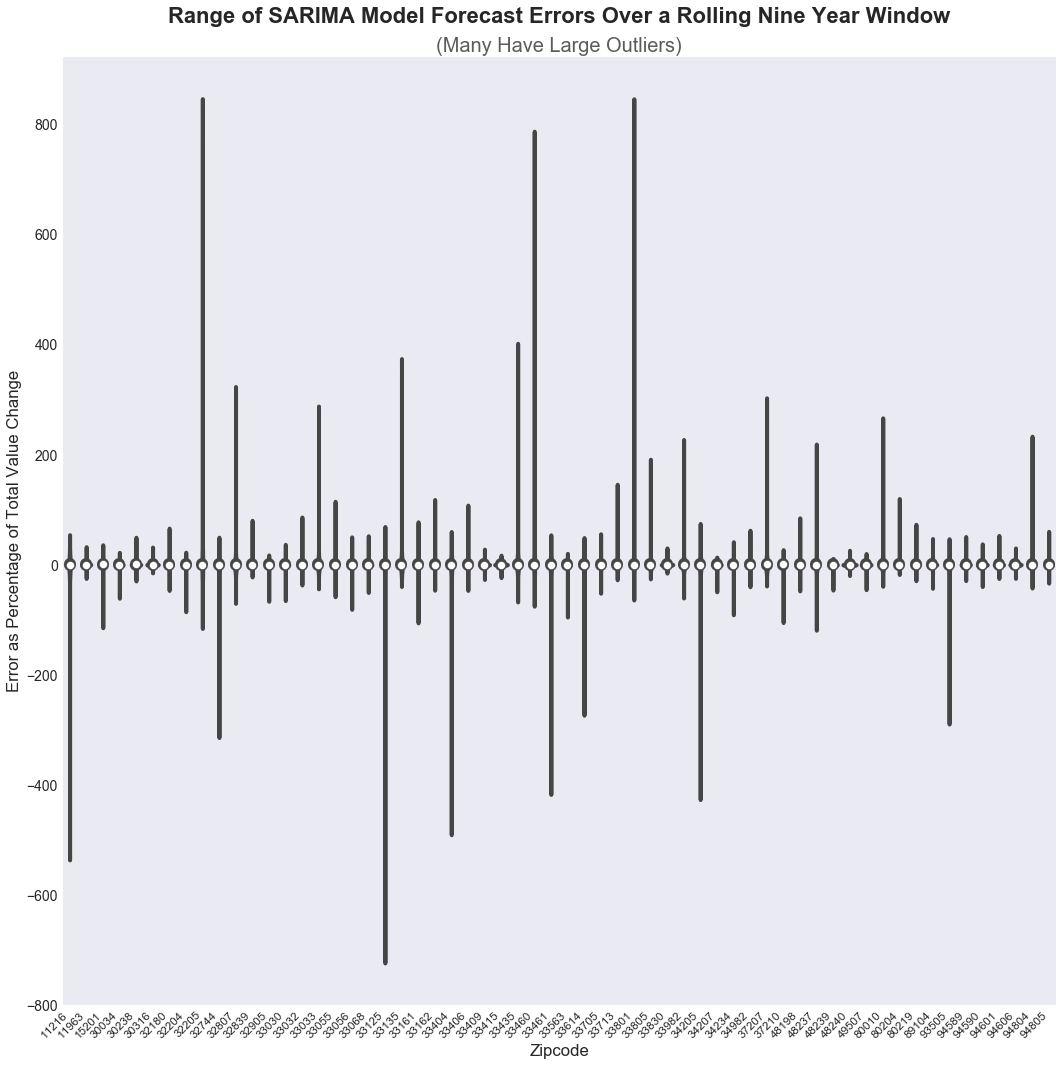

In [63]:
from matplotlib import style

# style.use('fivethirtyeight')
sns.set_style('dark')
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.violinplot(x='zipcode', y='error_pct', data=melted_errors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize='small')
ax.set_xlabel('Zipcode')
ax.set_ylabel('Error as Percentage of Total Value Change')
# ax.set_title('Forecast Errors of SARIMA Models Over a Rolling Nine Year Window')
ax.text(x=0.5, y=1.03, s='Range of SARIMA Model Forecast Errors Over a Rolling Nine Year Window', fontsize=22, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.0, s='(Many Have Large Outliers)', fontsize=20, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
fig.tight_layout()
fig.savefig('../figures/big_error_pct.png')
plt.show();

In [68]:
# Narrowing down zipcodes to model based off of historical range of errors
error_ranges = errors_df.max() - errors_df.min()
ten_smallest_error_ranges = error_ranges.sort_values().head(10)

In [69]:
ten_smallest_error_ranges

33415    36.814882
33830    40.823629
30316    41.332353
48240    41.609302
33409    49.175572
94606    49.763904
48239    50.012761
11963    51.025107
34207    56.223084
49507    59.345632
dtype: float64

In [73]:
target_zips = zipcodes[ten_smallest_error_ranges.index]

In [86]:
target_zips.median().sort_values()

33830     72000.0
49507     72800.0
48240     76700.0
34207     86700.0
48239     91400.0
33415    103800.0
33409    108400.0
30316    142100.0
94606    303600.0
11963    835000.0
dtype: float64

In [91]:
high_medians = target_zips[target_zips.median().sort_values().index[-2:]]
low_medians = target_zips[target_zips.median().sort_values().index[0:-2]]

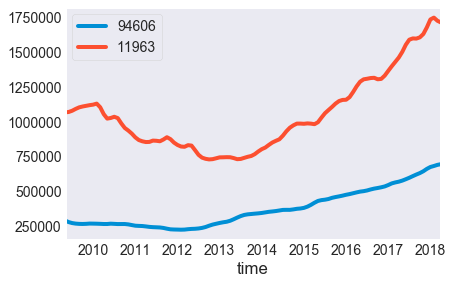

In [95]:
high_medians[-108:].plot()

In [97]:
melted_high_medians = high_medians.melt(var_name='zipcode', value_name='price')
melted_low_medians = low_medians.melt(var_name='zipcode', value_name='price')

In [93]:
low_medians

,33830,49507,48240,34207,48239,33415,33409,30316
time,,,,,,,,
1996-04-01,45200.0,49700.0,67800.0,67600.0,80100.0,70000.0,77300.0,62300.0
1996-05-01,45700.0,51000.0,68200.0,67800.0,80700.0,70100.0,77200.0,62300.0
1996-06-01,46200.0,52300.0,68500.0,68000.0,81300.0,70300.0,77200.0,62300.0
1996-07-01,46600.0,53500.0,68800.0,68200.0,81900.0,70400.0,77100.0,62300.0
1996-08-01,46900.0,54600.0,69200.0,68400.0,82500.0,70600.0,77100.0,62300.0
...,...,...,...,...,...,...,...,...
2017-12-01,126400.0,106600.0,71000.0,159900.0,90800.0,184100.0,190000.0,258800.0
2018-01-01,127700.0,107800.0,72300.0,160900.0,91900.0,186400.0,192500.0,261600.0
2018-02-01,129200.0,108900.0,73500.0,162300.0,93600.0,188600.0,193700.0,264300.0


In [75]:
melted_target_zips = target_zips.melt(var_name='zipcode', value_name='price')

In [81]:
melted_target_zips = target_zips[-108:].melt(var_name='zipcode', value_name='price')

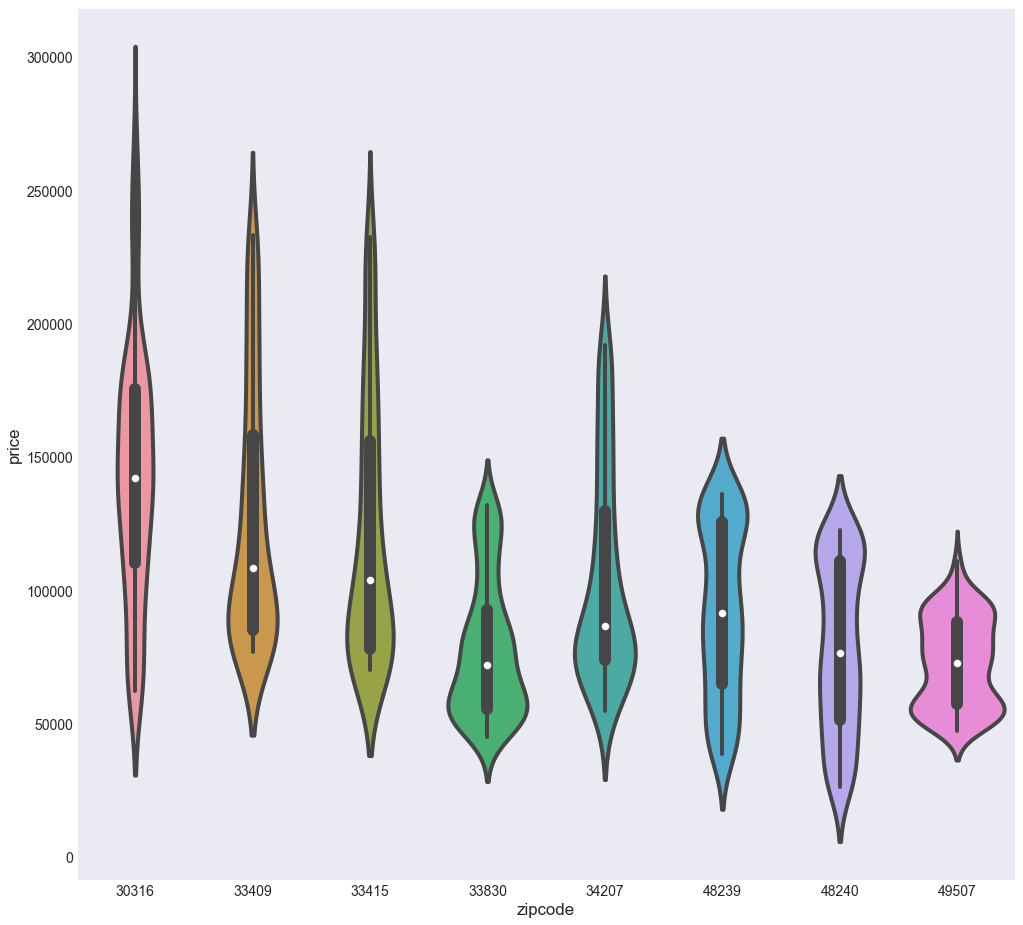

In [110]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.violinplot(x='zipcode', y='price', data=melted_low_medians)
# re.sub(r'000$', r',000', str(x))
# [x for x in ax.get_yticklabels()]
y_labels = ax.get_yticklabels()
# ax.set_yticklabels()
# [x.text for x in y_labels]
fig.savefig('../figures/draft_violinplot.png')

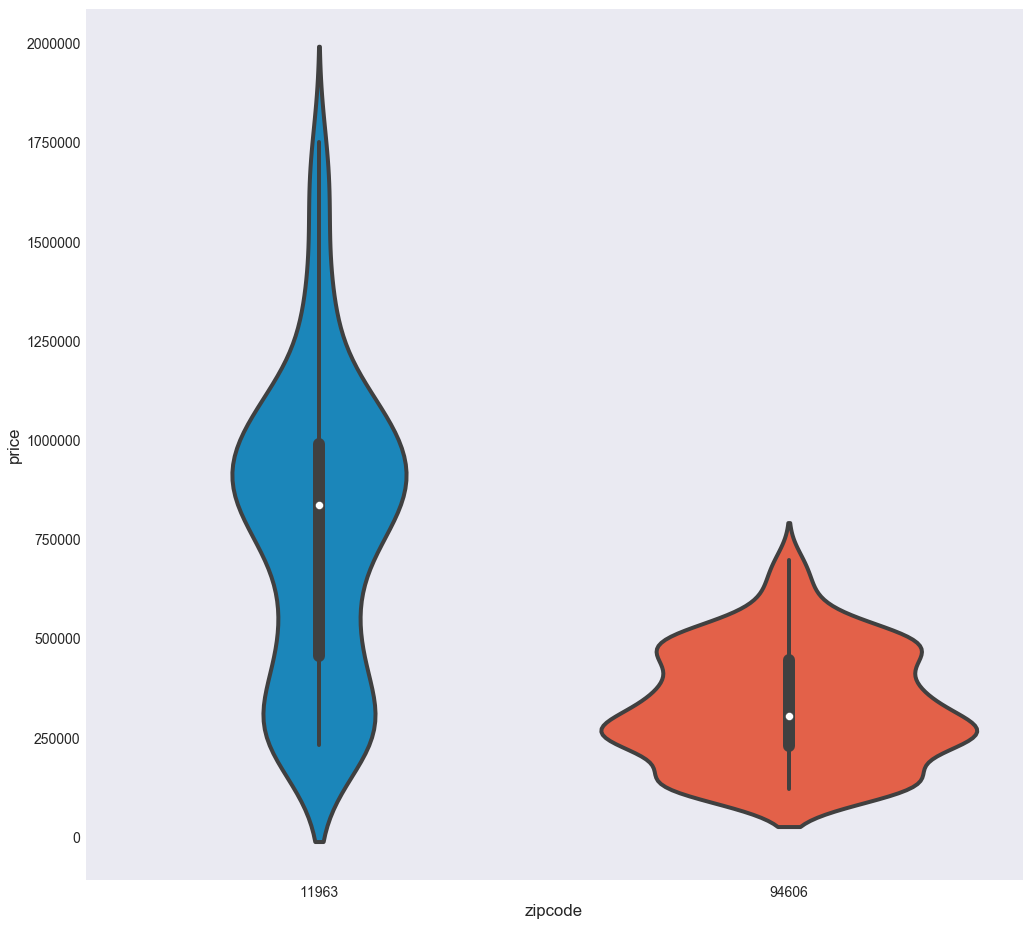

In [111]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.violinplot(x='zipcode', y='price', data=melted_high_medians)
# re.sub(r'000$', r',000', str(x))
# [x for x in ax.get_yticklabels()]
y_labels = ax.get_yticklabels()
# ax.set_yticklabels()
# [x.text for x in y_labels]
fig.savefig('../figures/draft_high_median_violinplot.png')

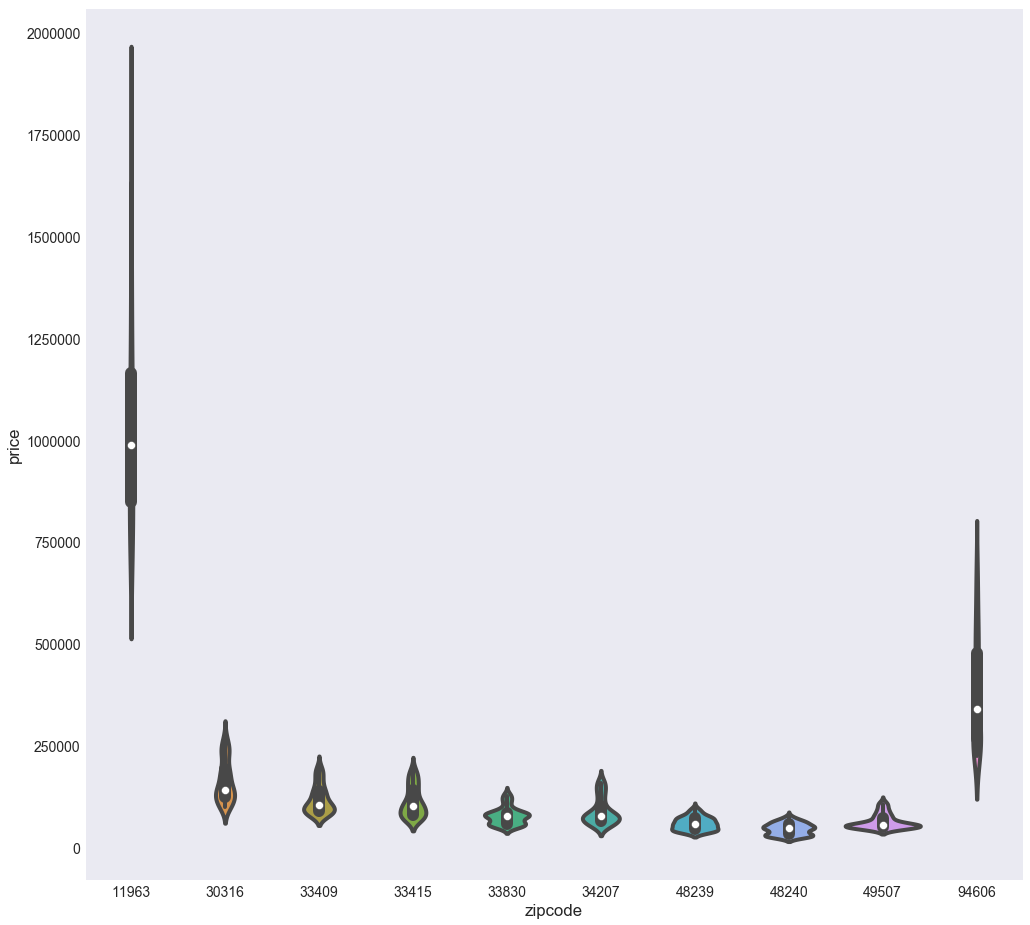

In [82]:


fig, ax = plt.subplots(figsize=(15,15))
sns.violinplot(x='zipcode', y='price', data=melted_target_zips)

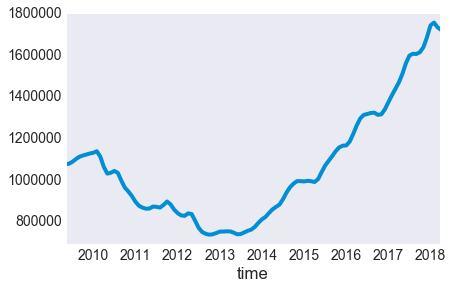

In [79]:
zipcodes['11963'][-108:].plot()

In [80]:
target_zips[-108:]

,33415,33830,30316,48240,33409,94606,48239,11963,34207,49507
time,,,,,,,,,,
2009-05-01,118500.0,88100.0,143900.0,61300.0,124000.0,291800.0,71100.0,1069200.0,86000.0,63700.0
2009-06-01,113900.0,85400.0,141700.0,58200.0,118700.0,280900.0,68200.0,1071600.0,82300.0,61600.0
2009-07-01,110400.0,83300.0,140200.0,55600.0,114400.0,273700.0,65800.0,1080500.0,79900.0,59400.0
2009-08-01,107900.0,81700.0,139600.0,53500.0,111200.0,269800.0,63800.0,1093700.0,78600.0,57500.0
2009-09-01,105900.0,80400.0,139900.0,51700.0,108600.0,267800.0,61900.0,1105000.0,77800.0,56400.0
...,...,...,...,...,...,...,...,...,...,...
2017-12-01,184100.0,126400.0,258800.0,71000.0,190000.0,663100.0,90800.0,1679800.0,159900.0,106600.0
2018-01-01,186400.0,127700.0,261600.0,72300.0,192500.0,676500.0,91900.0,1736600.0,160900.0,107800.0
2018-02-01,188600.0,129200.0,264300.0,73500.0,193700.0,683700.0,93600.0,1749800.0,162300.0,108900.0


In [160]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX


def RMSE(y_true, y_pred, last_only=True):
    """Simple wrapper function on mean_squared_error to return RMSE
    
    Params:
        predictions (series or array like object), the predicted values from model
        test_data (series or array like object), the true target values
        
    Returns:
        RMSE (list) list of accumulated RMSE values for each observation in consecutive time order
        i.e. the first return value will be just the error of first prediction, second the sqrt of mean squared error for first 2 predictions, etc."""

    
    # Ensure predictions and test_data are same size
    if len(y_pred) != len(y_true):
        return "Test data and predictions must have equal length"
    
    elif last_only == False:
        rmse = [mean_squared_error(y_true[:i+1], y_pred[:i+1], squared=False) for i, _ in enumerate(y_pred)]
        return rmse
    else:
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        return rmse

def error_as_pct(rmse, start_val, end_val):
    """Compute the error (rmse) as a percentage of the total change in value
    
    Params: rmse(float) the residual mean squared error of a forecast, start_val(float) the starting value in from the month before 
        forecasting begins, end_val(float) the last value of the forecast
        
    Returns:
        (float) rmse as a percentage of total change between start and end of forecast"""
    
    total_delta = end_val - start_val
    error_pct = rmse / total_delta
    return error_pct

def SARIMAX_error(series, p=10, d=2, q=2):
    """Simple wrapper that fits SARIMAX model and returns RMSE (raw and pct) for the predictions, confidence interval, start of forecast and end of actual 
    values"""
    
    
    X = series
    
    # set trainset to include all but last 48 months (4 years) only training on data between 9-4 years ago
    train_size = int(len(X) - 48)
    train, test = X[-108:train_size], X[train_size:]

    model = SARIMAX(train, order=(p,d,q), freq='MS', seasonal_order=(2,0,1,4), initialization='approximate_diffuse')

    results = model.fit()

    # Predict 48 months from end of train set
    forecast = results.get_forecast(steps=48)
    pred_ci = forecast.conf_int(alpha=.05)

    predictions = forecast.predicted_mean

    rmse = RMSE(test, predictions)
    pct = error_as_pct(rmse, train[-1], test[-1])
    
    return {'pred_ci': pred_ci, 'rmse': rmse, 'pct_error': pct, 'test': test, 'predictions': predictions, 'series': X}

In [114]:
sarimax_dict = {column: SARIMAX_error(target_zips[column]) for column in low_medians}

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueW

In [115]:
sarimax_dict

{'33830': [             lower 33830    upper 33830
  2014-05-01  69052.849142   71512.352845
  2014-06-01  68172.657576   75229.801647
  2014-07-01  67695.509275   78710.190738
  2014-08-01  67860.251378   82078.367944
  2014-09-01  67680.473793   85573.202140
  2014-10-01  67274.123374   89216.096527
  2014-11-01  66909.214779   93075.168200
  2014-12-01  66318.654858   97105.535933
  2015-01-01  65441.214566  101257.255586
  2015-02-01  64484.261828  105503.377477
  2015-03-01  63504.290952  109863.272738
  2015-04-01  62408.799709  114330.037875
  2015-05-01  61175.940770  118900.085302
  2015-06-01  59853.402336  123580.382311
  2015-07-01  58436.598664  128363.129667
  2015-08-01  56905.902523  133234.345694
  2015-09-01  55285.329706  138195.135215
  2015-10-01  53590.412446  143248.435124
  2015-11-01  51806.462848  148389.180485
  2015-12-01  49930.159876  153613.990986
  2016-01-01  47972.282400  158922.846633
  2016-02-01  45935.077732  164313.529477
  2016-03-01  43816.38795

In [116]:
sarimax_dict.keys()

dict_keys(['33830', '49507', '48240', '34207', '48239', '33415', '33409', '30316'])

In [117]:
sarimax_dict['33830']

[             lower 33830    upper 33830
 2014-05-01  69052.849142   71512.352845
 2014-06-01  68172.657576   75229.801647
 2014-07-01  67695.509275   78710.190738
 2014-08-01  67860.251378   82078.367944
 2014-09-01  67680.473793   85573.202140
 2014-10-01  67274.123374   89216.096527
 2014-11-01  66909.214779   93075.168200
 2014-12-01  66318.654858   97105.535933
 2015-01-01  65441.214566  101257.255586
 2015-02-01  64484.261828  105503.377477
 2015-03-01  63504.290952  109863.272738
 2015-04-01  62408.799709  114330.037875
 2015-05-01  61175.940770  118900.085302
 2015-06-01  59853.402336  123580.382311
 2015-07-01  58436.598664  128363.129667
 2015-08-01  56905.902523  133234.345694
 2015-09-01  55285.329706  138195.135215
 2015-10-01  53590.412446  143248.435124
 2015-11-01  51806.462848  148389.180485
 2015-12-01  49930.159876  153613.990986
 2016-01-01  47972.282400  158922.846633
 2016-02-01  45935.077732  164313.529477
 2016-03-01  43816.387954  169782.710260
 2016-04-01  416

In [123]:
high_sarimax = {column: SARIMAX_error(target_zips[column]) for column in high_medians}

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive paramete

In [126]:
test_94606 = high_sarimax['94606']['test']
preds_94606 = high_sarimax['94606']['predictions']


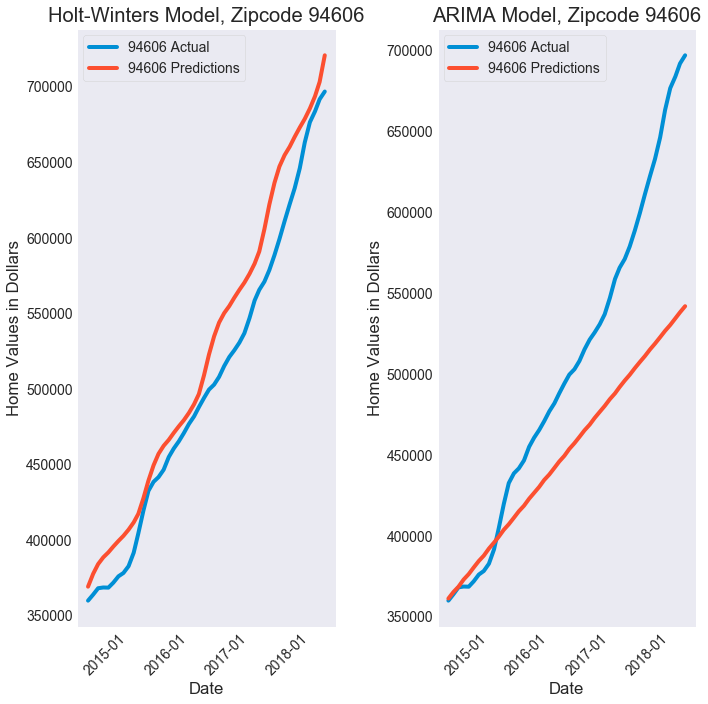

In [158]:
import matplotlib.dates as mdates

fig, (ax, ax1) = plt.subplots(1, 2, figsize=(10,10))

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m')

sns.lineplot(data=test, label='94606 Actual', ax=ax)
sns.lineplot(data=forecast, label='94606 Predictions', ax=ax)
ax.set_title('Holt-Winters Model, Zipcode 94606')
ax.set_ylabel('Home Values in Dollars')
ax.set_xlabel('Date')
ax.set_xticklabels(test.index, horizontalalignment='right', rotation=45)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x

sns.lineplot(data=test_94606, label='94606 Actual', ax=ax1)
sns.lineplot(data=preds_94606, label='94606 Predictions', ax=ax1)

ax1.set_title('ARIMA Model, Zipcode 94606')
ax1.set_ylabel('Home Values in Dollars')
ax1.set_xlabel('Date')
ax1.set_xticklabels(test_94606.index, horizontalalignment='right', rotation=45)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax1.format_ydata = lambda x: '$%1.2f' % x

fig.tight_layout()
fig.savefig('../figures/model_comparison.png')

In [244]:
series = high_medians['94606']

X = series[-108:]

# set trainset to include all but last 48 months (4 years) only training on data between 9-4 years ago
train_size = int(len(X) - 48)
train, test = X[-108:train_size], X[train_size:]


model = ExponentialSmoothing(train, trend='mul', seasonal='mul', freq='MS')

results = model.fit()

# Predict 48 months from end of train set
forecast_hw = results.predict(start=test.index[0], end=test.index[-1])

Text(0.5, 0, 'Date')

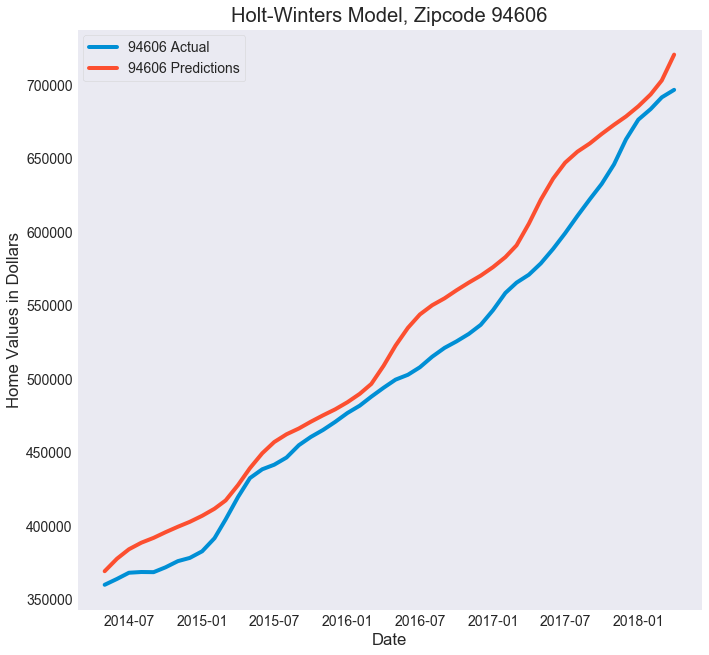

In [143]:
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=test, label='94606 Actual')
sns.lineplot(data=forecast, label='94606 Predictions')
ax.set_title('Holt-Winters Model, Zipcode 94606')
ax.set_ylabel('Home Values in Dollars')
ax.set_xlabel('Date')

In [ ]:
def hw_rmse(series):
    """Simple wrapper that fits holtwinters model and returns RMSE for the predictions
    
    Params: (series) a timeseries to model
    
    Returns: rmse (float) the raw RMSE, rmse_pct (float) the RMSE represented as a percentage of total change in value"""
    

    X = series[-108:]

    # set trainset to include all but last 48 months (4 years) only training on data between 9-4 years ago
    train_size = int(len(X) - 48)
    train, test = X[-108:train_size], X[train_size:]


    model = ExponentialSmoothing(train, trend='add', seasonal='add', freq='MS')

    results = model.fit()

    # Predict 48 months from end of train set
    forecast = results.predict(start=test.index[0], end=test.index[-1])
    
    rmse = RMSE(test, forecast)
    rmse_pct = error_as_pct(rmse, train[-1], test[-1])
    return (rmse, rmse_pct)

In [121]:
high_sarimax['94606']

[              lower 94606   upper 94606
 2014-05-01  352806.744804  3.698014e+05
 2014-06-01  342688.572588  3.880508e+05
 2014-07-01  334018.604406  4.031527e+05
 2014-08-01  325144.121885  4.208667e+05
 2014-09-01  313526.603784  4.392676e+05
 2014-10-01  301912.708952  4.590203e+05
 2014-11-01  288032.822532  4.809561e+05
 2014-12-01  272890.722649  5.026493e+05
 2015-01-01  257249.773164  5.270762e+05
 2015-02-01  239349.973345  5.523773e+05
 2015-03-01  221384.858286  5.774372e+05
 2015-04-01  202612.254965  6.049294e+05
 2015-05-01  181962.098601  6.323553e+05
 2015-06-01  161474.170040  6.609224e+05
 2015-07-01  139478.580922  6.909187e+05
 2015-08-01  116592.561864  7.206296e+05
 2015-09-01   93611.116751  7.522549e+05
 2015-10-01   68901.859023  7.841549e+05
 2015-11-01   44102.352454  8.164272e+05
 2015-12-01   18548.056230  8.504388e+05
 2016-01-01   -8349.424874  8.841593e+05
 2016-02-01  -35088.077539  9.190938e+05
 2016-03-01  -63125.304657  9.549220e+05
 2016-04-01  -91

In [243]:
predictions

2014-05-01    360449.566204
2014-06-01    364998.920202
2014-07-01    369648.335378
2014-08-01    372797.962743
2014-09-01    376797.095140
2014-10-01    381895.803158
2014-11-01    387094.633522
2014-12-01    390793.888230
2015-01-01    395342.586806
2015-02-01    400990.648867
2015-03-01    406738.894431
2015-04-01    410987.776460
2015-05-01    416086.041204
2015-06-01    422283.457329
2015-07-01    428581.118106
2015-08-01    433379.627433
2015-09-01    439027.458332
2015-10-01    445774.228544
2015-11-01    452621.304547
2015-12-01    457969.441150
2016-01-01    464166.838192
2016-02-01    471462.962513
2016-03-01    478859.453753
2016-04-01    484757.217610
2016-05-01    491504.180782
2016-06-01    499349.659235
2016-07-01    507295.565725
2016-08-01    513742.956813
2016-09-01    521039.486104
2016-10-01    529434.318711
2016-11-01    537929.640463
2016-12-01    544926.658760
2017-01-01    552772.754156
2017-02-01    561716.940939
2017-03-01    570761.677966
2017-04-01    578308

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


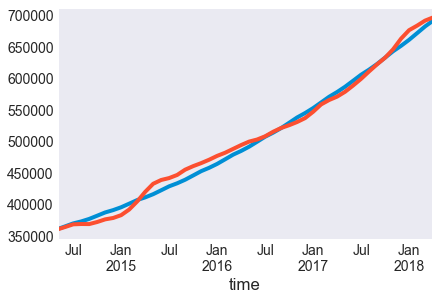

In [241]:
X = high_medians['94606']

# set trainset to include all but last 48 months (4 years) only training on data between 9-4 years ago
train_size = int(len(X) - 48)
train, test = X[-108:train_size], X[train_size:]

model = SARIMAX(train, freq='MS', order=(0,2,1), seasonal_order=(1,1,0,2), initialization='approximate_diffuse')

results = model.fit()

# Predict 48 months from end of train set
forecast = results.get_forecast(steps=48)
pred_ci = forecast.conf_int(alpha=.05)

predictions = forecast.predicted_mean

rmse = RMSE(test, predictions)
pct = error_as_pct(rmse, train[-1], test[-1])

predictions.plot()
test.plot()

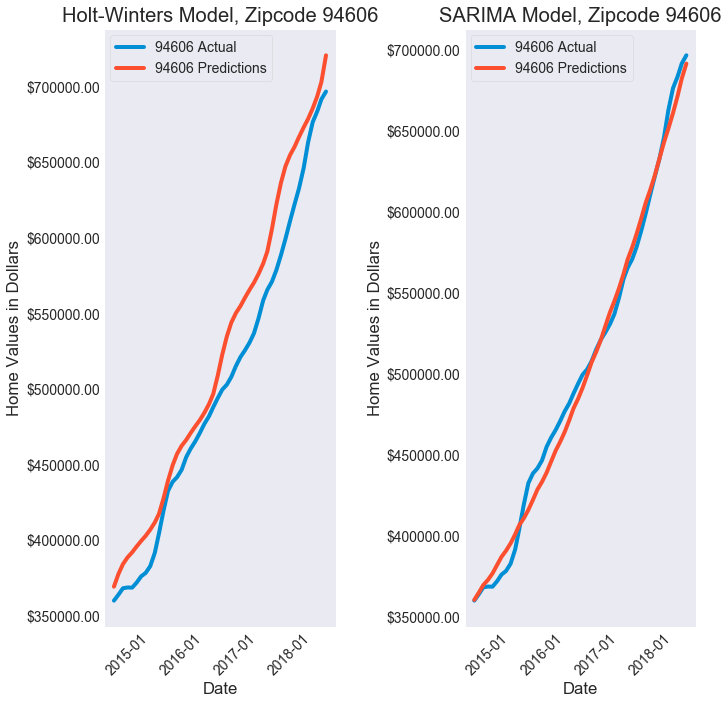

In [247]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker




formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_formatter(formatter)

fig, (ax, ax1) = plt.subplots(1, 2, figsize=(10,10))

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m')

sns.lineplot(data=test, label='94606 Actual', ax=ax)
sns.lineplot(data=forecast_hw, label='94606 Predictions', ax=ax)
ax.set_title('Holt-Winters Model, Zipcode 94606')
ax.set_ylabel('Home Values in Dollars')
ax.set_xlabel('Date')
ax.set_xticklabels(test.index, horizontalalignment='right', rotation=45)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
# ax.format_ydata = lambda x: '$%1.2f' % x

sns.lineplot(data=test_94606, label='94606 Actual', ax=ax1)
sns.lineplot(data=predictions, label='94606 Predictions', ax=ax1)

ax1.set_title('SARIMA Model, Zipcode 94606')
ax1.set_ylabel('Home Values in Dollars')
ax1.set_xlabel('Date')
ax1.set_xticklabels(test_94606.index, horizontalalignment='right', rotation=45)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.format_xdata = mdates.DateFormatter('%Y-%m-%d')
# ax1.format_ydata = lambda x: '$%1.2f' % x

formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_formatter(formatter)

fig.tight_layout()
fig.savefig('../figures/model_comparison.png')